In [2]:
import pandas as pd
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')
print(df.head())


   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [6]:
import pandas as pd
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')

# Get the column names as a Pandas Index object
column_names = df.columns
print(column_names)


Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [10]:
#Checking Quality

print(df['Score'].value_counts())
print(df.isnull().sum())

Score
5    49811
4    11797
1     7482
3     6481
2     4428
Name: count, dtype: int64
Id                        0
ProductId                 0
UserId                    0
ProfileName               6
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64


In [11]:
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')
df = pd.read_csv('data/Day3 Data/Reviews-2.csv')
df = pd.read_csv('data/Day3 Data/Reviews-3.csv')
df = pd.read_csv('data/Day3 Data/Reviews-4.csv')

In [12]:
print(df['Score'].value_counts())
print(df.isnull().sum())

Score
5    173376
4     37399
1     24483
3     19476
2     13721
Name: count, dtype: int64
Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   15
Text                       0
dtype: int64


In [13]:
df = df.dropna(subset=['Text', 'Score'])


In [14]:
df = df.drop_duplicates()


In [15]:
print(df['Score'].value_counts())
print(df.isnull().sum())

Score
5    173376
4     37399
1     24483
3     19476
2     13721
Name: count, dtype: int64
Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   15
Text                       0
dtype: int64


In [16]:
df['Text'] = df['Text'].str.lower().str.replace('[^a-z ]', '', regex=True)


In [18]:
df = df[df['Text'].str.len() > 10]


In [19]:
print(df['Score'].value_counts())


Score
5    173376
4     37399
1     24483
3     19476
2     13721
Name: count, dtype: int64


In [20]:
df = pd.read_csv('data/Day3 Data/Reviews-1.csv')

In [22]:
df = pd.read_csv('data/Day4 Data/amazon_fashion.csv')

In [23]:
column_names = df.columns
print(column_names)

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchases', 'target'],
      dtype='object')


In [24]:
print(df['rating'].value_counts())

rating
1.0    173462
2.0    173462
3.0    173462
4.0    173462
5.0    173462
Name: count, dtype: int64


In [25]:
print(df['rating'].value_counts())
print(df.isnull().sum())


rating
1.0    173462
2.0    173462
3.0    173462
4.0    173462
5.0    173462
Name: count, dtype: int64
rating                  0
title                 203
text                  298
images                  0
asin                    0
parent_asin             0
user_id                 0
timestamp               0
helpful_vote            0
verified_purchases      0
target                  0
dtype: int64


In [27]:
df = pd.read_csv('data/Day4 Data/amazon_fashion.csv')


In [28]:
df = df.dropna(subset=['text', 'rating'])


In [29]:
df = df.drop_duplicates()


In [30]:
df['text'] = df['text'].str.lower().str.replace('[^a-z ]', '', regex=True)


In [31]:
print(df['rating'].value_counts())


rating
5.0    173108
4.0    172461
1.0    172275
3.0    172247
2.0    171657
Name: count, dtype: int64


In [32]:
import os
os.makedirs('data/cleaned_day4dataset', exist_ok=True)
df.to_csv('data/cleaned_dataset/cleaned_day4data.csv', index=False)


<Axes: title={'center': 'Rating Distribution'}, xlabel='rating'>

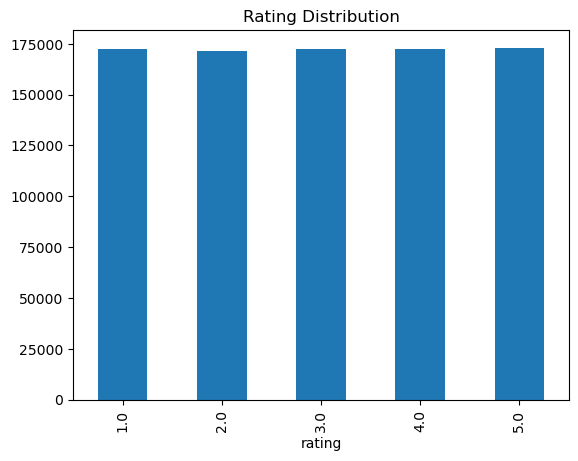

In [33]:
df['rating'].value_counts().sort_index().plot(kind='bar', title='Rating Distribution')


<Axes: title={'center': 'Review Length Distribution'}, ylabel='Frequency'>

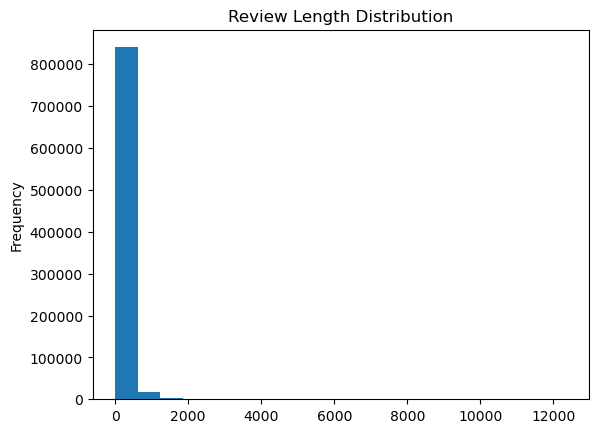

In [34]:
df['text'].str.len().plot(kind='hist', bins=20, title='Review Length Distribution')


In [35]:
balanced_df = df.groupby('rating').sample(n=2000, random_state=42, replace=True)


In [36]:
balanced_df.to_csv('data/cleaned_dataset/balanced_data.csv', index=False)
